## Estudnado as Equações de Frenet e Desenhando a curva a partir da curvatura em python

### Aluna: Luiza Schneider Sampaio

### Importando as bibliiotecas necessárias

In [109]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

### Definindo a curva

In [105]:
t = sp.symbols('t')
x =  sp.cos(t)
y = sp.sin(t)
z = 3*sp.cos(t)

### Reparametrização por unit-speed

In [4]:
def arc_Length(x,y):
    dx_dt = sp.diff(x,t)
    dy_dt = sp.diff(y,t)

    vel = sp.sqrt(dx_dt**2 + dy_dt**2)

    return sp.simplify(sp.integrate(vel, (t,0,t)))

### Primeiro passo: definir a função que calcula a curvatura

Vamos, primeiramente, definir a função $\kappa(s)$ 

A função curvature recebe $x$ e $y$ e calcula a curvatura de uma curva $\alpha(t) = (x(t),y(t))$

Esta função será útil para o segundo passo, que é resolver as equações de Frenet.

Relembremos a equação da curvatura:

Se a curva for unit-speed $$| \kappa (t)| = ||\alpha''(t)|| $$

Se não, $$\kappa(t) = \frac{\det [\alpha'(t), \alpha''(t)]}{||\alpha'(t)||^3}$$

In [106]:
# Calculate the curvature of a curve
def curvature(x, y):
    norm = sp.simplify(sp.sqrt(x**2 + y**2))
    dx_dt = sp.diff(x,t)
    dy_dt = sp.diff(y,t)
    dxx_d2t = sp.diff(dx_dt,t)
    dyy_d2t = sp.diff(dy_dt, t)

    if norm == 1:
        return sp.simplify(sp.sqrt(dxx_d2t**2 + dyy_d2t**2))
    
    else:
        return sp.simplify((dx_dt*dyy_d2t - dy_dt*dxx_d2t)/((sp.sqrt(dx_dt**2 + dy_dt**2))**3))
   

curvature(x,y)

1

### Segundo passo: Equações de Frenet

As equações de Frenet são:

$$T' = \kappa N $$

$$N' = -\kappa T$$

Sendo $T$ o vetor tangente, $N$ o vetor normal e $\kappa$ a curvatura

Como $T'$ é ortogonal a $T$, temos que $T'$ é paralelo a $N$, e, então, $N'$ é paralelo a $T$. Então,

$$T' = \langle T', N \rangle N  \text{ }\text{e}\text{ }  N' = \langle N', T \rangle T$$

Mas, $\langle T', N \rangle = \langle T', JT \rangle = \det (T,T') = \kappa$ e $\langle N', T \rangle = \langle JT', T \rangle = -\det (T,T') = -\kappa$

Portanto, segue que $$\kappa(s) = \langle T'(s), N(s) \rangle = \langle \alpha(s)'', N(s) \rangle$$

Vale ressaltar que se a curva não tiver em unit-speed, esta fórmula não é válida.

In [107]:
def T(x,y,z):
    if z == 0:
        norm = sp.sqrt(sp.diff(x,t)**2 + sp.diff(y,t)**2)
        return sp.simplify(sp.diff(x,t)/norm), sp.simplify(sp.diff(y,t)/norm)
    else:
        dx_dt = sp.diff(x, t)
        dy_dt = sp.diff(y, t)
        dz_dt = sp.diff(z, t)
        norm = sp.sqrt(dx_dt**2 + dy_dt**2 + dz_dt**2)
        return sp.simplify(dx_dt/norm), sp.simplify(dy_dt/norm), sp.simplify(dz_dt/norm)

def N(x,y,z):
    if z ==0:
        T1, T2 = T(x, y, 0)
        dT1_dt = sp.diff(T1, t)
        dT2_dt = sp.diff(T2, t)
        norm = sp.sqrt(dT1_dt**2 + dT2_dt**2)
        return sp.simplify(dT1_dt/norm), sp.simplify(dT2_dt/norm)
    else:
        T1, T2, T3 = T(x, y, z)
        dT1_dt = sp.diff(T1, t)
        dT2_dt = sp.diff(T2, t)
        dT3_dt = sp.diff(T3, t)
        norm = sp.sqrt(dT1_dt**2 + dT2_dt**2 + dT3_dt**2)
        return sp.simplify(dT1_dt/norm), sp.simplify(dT2_dt/norm), sp.simplify(dT3_dt/norm)

def B(x, y, z):
    T1, T2, T3 = T(x, y, z)
    N1, N2, N3 = N(x, y, z)
    B1 = sp.simplify(T2*N3 - T3*N2)
    B2 = sp.simplify(T3*N1 - T1*N3)
    B3 = sp.simplify(T1*N2 - T2*N1)
    return B1, B2, B3

### Terceiro passo: Resolver as equações diferenciais

### Quarto passo: Integrar para Obter a Curva

### Visualização 

### Diedro de Frenet
O diedro de Frenet é o plano gerado pelos vetores tangente e normal.

MovieWriter imagemagick unavailable; using Pillow instead.


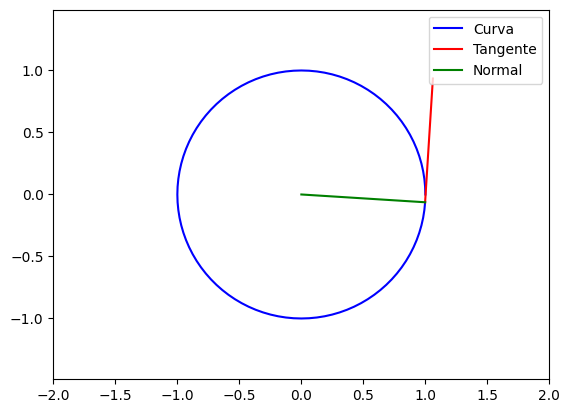

In [108]:
T_val = sp.lambdify(t, T(x,y,0)) 
N_val = sp.lambdify(t, N(x,y,0)) 

fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis('equal')

line, = ax.plot([], [], 'b-')  
tangent_line, = ax.plot([], [], 'r-')  
normal_line, = ax.plot([], [], 'g-') 

ax.legend(['Curva', 'Tangente', 'Normal'], loc='upper right')



def animate(i):
    t_val = 2 * np.pi * i / 100
    x_val, y_val = float(x.subs(t, t_val).evalf()), float(y.subs(t, t_val).evalf())

    line.set_data([float(x.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)],
                  [float(y.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)])

    tangent_vector = T_val(t_val)
    tangent_line.set_data([x_val, x_val + tangent_vector[0]],
                          [y_val, y_val + tangent_vector[1]])
    
    normal_vector = N_val(t_val)
    normal_line.set_data([x_val, x_val + normal_vector[0]],
                         [y_val, y_val + normal_vector[1]])

    return line, tangent_line, normal_line

ani = FuncAnimation(fig, animate, frames=100, interval=100, blit=True)

#GIF
ani.save('diedroFrenet.gif', writer='imagemagick', fps=60)


### Triedro de Frenet

Para curvas parametrizadas por comprimento de arco, os vetores tangente, normal e binormal formam um sistema ortonormal chamado triedro de Frenet.

T (vetor tangente): indica a direção da curva.
\
N (vetor normal): é perpendicular à tangente e aponta para o centro de curvatura da curva.
\
B (vetor binormal): é perpendicular tanto à tangente quanto à normal.



MovieWriter imagemagick unavailable; using Pillow instead.


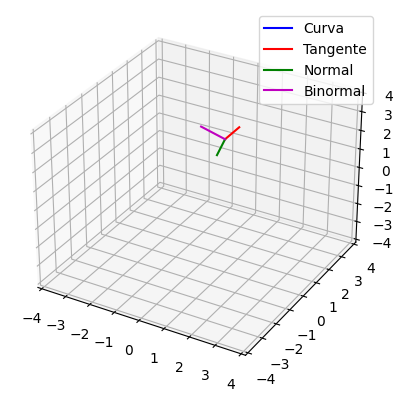

In [111]:
T_val = sp.lambdify(t, T(x,y,z))
N_val = sp.lambdify(t, N(x,y,z))
B_val = sp.lambdify(t, B(x,y,z))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-4, 4)

# Inicializando as linhas para a curva e os vetores
line, = ax.plot([], [], [], 'b-')
tangent_line, = ax.plot([], [], [], 'r-')
normal_line, = ax.plot([], [], [], 'g-')
binormal_line, = ax.plot([], [], [], 'm-')

ax.legend(['Curva', 'Tangente', 'Normal', 'Binormal'], loc='upper right')

def animate(i):
    t_val = 2 * np.pi * i / 100
    x_val, y_val, z_val = float(x.subs(t, t_val).evalf()), float(y.subs(t, t_val).evalf()), float(z.subs(t, t_val).evalf())

    line.set_data([float(x.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)],
                  [float(y.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)])
    line.set_3d_properties([float(z.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)])

    tangent_vector = T_val(t_val)
    tangent_line.set_data([x_val, x_val + tangent_vector[0]],
                          [y_val, y_val + tangent_vector[1]])
    tangent_line.set_3d_properties([z_val, z_val + tangent_vector[2]])
    
    normal_vector = N_val(t_val)
    normal_line.set_data([x_val, x_val + normal_vector[0]],
                         [y_val, y_val + normal_vector[1]])
    normal_line.set_3d_properties([z_val, z_val + normal_vector[2]])
    
    binormal_vector = B_val(t_val)
    binormal_line.set_data([x_val, x_val + binormal_vector[0]],
                           [y_val, y_val + binormal_vector[1]])
    binormal_line.set_3d_properties([z_val, z_val + binormal_vector[2]])

    return line, tangent_line, normal_line, binormal_line

ani = FuncAnimation(fig, animate, frames=100, interval=100, blit=False)

# Salvar como GIF
ani.save('triedroFrenet.gif', writer='imagemagick', fps=60)